# AACT features with target variable + Adverse Events information + Dropout Reason

## Prep Data for Modeling 

In [ ]:
!pip install collinearity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary packages:

import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn import svm
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns

import scipy.stats as spstats
%matplotlib inline

from collinearity import SelectNonCollinear

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
# Import necessary packages:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier 
from sklearn import svm
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import AACT files - all diseases
master_disease_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Master Notebooks/master_clean_df.csv", index_col=0)
master_ae_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Master Notebooks/master_ae.csv")
master_dropout_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/NLP Dropout Reason/Dropout Output Files/master_clean_dropout.csv", index_col=0)

In [ ]:
master_dropout_df = master_dropout_df.iloc[:, 0:9]

In [ ]:
MIN = 100
MAX = 0
master_disease_df['percent_attrition'].sub(MIN).div(MAX-MIN).clip(0, 1)

0     0.660714
1     0.931818
2     0.960000
3     0.700000
4     0.360710
        ...   
44    0.750000
45    0.483660
46    0.795580
47    0.851528
48    0.500000
Name: percent_attrition, Length: 1359, dtype: float64

Splittarget variable into 4 classifications based on distribution of clinical trial attrition with all neuropsychiatric trials

In [ ]:
V4 = pd.merge(master_ae_df, master_disease_df, on='nct_id', how='inner')
V4_df = pd.merge(master_dropout_df, V4, on=['nct_id'], how='inner')

In [ ]:
Counter(V4_df['disease_type'])

Counter({"Alzheimer's Disease": 193,
         'Amyotrophic lateral sclerosis': 2,
         'Anxiety': 37,
         'Bipolar': 37,
         'Depression': 339,
         "Parkinson's Disease": 192})

In [ ]:
#drop nct_id, enrollment_total, drop_count_total, has_expanded_access column 
V4_master_df = V4_df.drop(['nct_id', 'quantile_attrition_range', 'enrollment_total', 'drop_count_total', 'has_expanded_access'], axis = 1)

In [ ]:
#convert booleon to binary : has_dmc
V4_master_df.has_dmc = V4_master_df.has_dmc.replace({True: 1, False: 0})
V4_master_df.health_status_eligibility = V4_master_df.health_status_eligibility.replace({'10.0': 0, 'No': 0, 'Accepts Healthy Volunteers' : 1})
#0-does not accept helathy volunteers 1-does accept healthy volunteers
V4_master_df.rename(columns = {'health_status_eligibility':'Accepts_Healthy_volunteers'}, inplace = True)

#one-hot encode categorical colemsn : study_type, study_phase, minimum_age_num, intervention_model_type, allocation_type, masking_type, study_gender_eligibility
prefix_cols = ['study_type',  'study_phase', 'minimum_age_num', 'intervention_model_type', 'allocation_type', 'masking_type', 'study_gender_eligibility']
dummy_cols = ['study_type', 'study_phase', 'minimum_age_num', 'intervention_model_type', 'allocation_type', 'masking_type', 'study_gender_eligibility']

V4_master_df = pd.get_dummies(V4_master_df, prefix=prefix_cols, columns=dummy_cols)

In [ ]:
V4_master_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
V4_master_df.isnull().sum().sum()

0

## Depression

### Subset Depression Studies / Split into test and train sets

In [ ]:
V4_depression_df = V4_master_df[V4_master_df['disease_type'] == "Depression"]
V4_depression_df = V4_depression_df.drop(columns=['disease_type', 'intervention_model_type_Sequential Assignment'])

#split into features and outcome dataframes
X_df = V4_depression_df.drop(columns=['percent_attrition'])
y_df = V4_depression_df.percent_attrition

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
5,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,1,0,0,0,1,0,0,1,0,0
7,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,...,1,0,1,0,0,0,0,1,0,0
405,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
406,8.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,10.0,0.0,...,1,0,0,0,1,0,0,1,0,0
407,13.0,0.0,0.0,114.0,7.0,8.0,1.0,0.0,22.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#select all ae columns
ae_df = X_df.iloc[:,9:1962]

#replace all non zero cells with 1
ae_df[ae_df != 0] = 1

#add all columns and select the top ten most prevelant
s = ae_df.sum()
top_ae_table = ae_df[s.sort_values(ascending=False).index[:10]]

#generated list of most prevelant ae
top_ae_table_list = list(top_ae_table.columns)

In [ ]:
X_df.shape

(339, 2010)

In [ ]:
X_df = X_df.loc[:, (X_df != 0).any(axis=0)]
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
5,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,1,0,0,0,1,0,0,1,0,0
7,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,...,1,0,1,0,0,0,0,1,0,0
405,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
406,8.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,10.0,0.0,...,1,0,0,0,1,0,0,1,0,0
407,13.0,0.0,0.0,114.0,7.0,8.0,1.0,0.0,22.0,0.0,...,0,0,1,0,0,0,0,1,0,0


### Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_df, thresh=4.0):
    variables = list(range(X_df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_df.columns[variables])
    return X_df.iloc[:, variables]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
5,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,1,0,0,0,1,0,0,1,0,0
7,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,...,1,0,1,0,0,0,0,1,0,0
405,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
406,8.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,10.0,0.0,...,1,0,0,0,1,0,0,1,0,0
407,13.0,0.0,0.0,114.0,7.0,8.0,1.0,0.0,22.0,0.0,...,0,0,1,0,0,0,0,1,0,0


### Corelated Feature Drop

In [ ]:
df_corr = X_df.corr()
df_corr.head()

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
dropout_reason_adverse event,1.000000,0.236928,0.050688,0.592236,0.569987,0.663702,0.227710,0.681694,0.673219,-0.057171,...,-0.003499,-0.044567,0.003703,-0.056593,0.040543,-0.117357,0.074695,0.093445,-0.074829,-0.058233
dropout_reason_consent withdrawn,0.236928,1.000000,-0.033768,0.030314,0.045809,0.216796,-0.057828,0.290410,-0.108052,-0.024285,...,-0.038401,0.046037,0.001759,-0.024735,-0.046656,-0.050382,0.043163,0.061071,-0.055159,-0.024735
dropout_reason_death,0.050688,-0.033768,1.000000,0.056496,0.104402,0.166846,0.000384,-0.035764,0.165816,-0.016003,...,0.035980,-0.058782,0.089205,-0.016300,-0.031071,0.057242,-0.038576,0.031771,-0.027084,-0.016300
dropout_reason_inclusion/exclusion criteria issue,0.592236,0.030314,0.056496,1.000000,0.418130,0.429081,0.081411,0.355182,0.402866,-0.032966,...,-0.094862,-0.012105,0.073121,-0.033578,0.001313,-0.053890,-0.038335,0.064637,-0.054907,-0.033578
dropout_reason_lack of efficacy,0.569987,0.045809,0.104402,0.418130,1.000000,0.365045,0.087598,0.243812,0.386981,-0.027997,...,0.017603,0.013323,0.047799,-0.029400,0.015803,-0.059881,-0.048964,0.052537,-0.043639,-0.029400


In [ ]:
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_df.columns[columns]
selected_columns
X_df = X_df[selected_columns]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,0
5,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,1,0,0,1,0,0,1,0,0
7,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,...,0,1,0,1,0,0,0,1,0,0
405,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
406,8.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,10.0,0.0,...,0,1,0,0,1,0,0,1,0,0
407,13.0,0.0,0.0,114.0,7.0,8.0,1.0,0.0,22.0,0.0,...,1,0,0,1,0,0,0,1,0,0


Standardize and split data 

In [ ]:
X_df_norm = (X_df-X_df.min())/(X_df.max()-X_df.min())

In [ ]:
mean(y_df)

25.157495598463377

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((271, 334), (68, 334))

### Feature Selection

#### Feature Importance with Gradient Boosting

In [ ]:
# GradientBoostingRegressor will be used for feature importance
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_preds = reg_model.predict(X_test)
r2_score(y_test, y_preds)

0.4288759363250807

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
dropout_reason_inclusion/exclusion criteria issue,0.318439
dropout_reason_lost to follow-up,0.058545
event_type_other,0.045327
Headache,0.040401
study_duration_months,0.038388
Abdominal pain,0.037683
intervention_model_type_Factorial Assignment,0.037326
Genetic,0.034936
Nausea,0.028028
dropout_reason_adverse event,0.025854


In [ ]:
#create list of top 30 features
boost_top_10 = feature_imp.head(10).index.values
boost_top_10_list = list(boost_top_10)

In [ ]:
X_boost_df = X_df[X_df.columns.intersection(boost_top_10_list)]

In [ ]:
# Train/test split:
X_boost_train, X_boost_test, y_train, y_test = train_test_split(X_boost_df, y_df, test_size = 0.2, random_state = 2)

X_boost_train.shape, X_boost_test.shape

((271, 10), (68, 10))

##### Model Set-up

In [ ]:
# Continous outcome prediction:

def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  # Make predictions with model
  y_pred = reg_model.predict(X_test)
  #Metrics
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val}

Linear Regression

In [ ]:
# Linear Regression:

lr_model = LinearRegression()

scores = cross_val_score(lr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([-0.52372859,  0.22300902,  0.40490087,  0.28289511,  0.22152235])

In [ ]:
# k-fold CV (using all the boost variables)
train_and_test(lr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 320.12078109174996, 'R2_Score': 0.27008943892479653}

Random Forest

In [ ]:
# Random Forest Regression:

rfr_model = RandomForestRegressor()

scores = cross_val_score(rfr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.21087431, 0.4829302 , 0.49542987, 0.26260168, 0.45673906])

In [ ]:

train_and_test(rfr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 239.01657569297282, 'R2_Score': 0.455015940310575}

Gradient Boosting

In [ ]:
# Gradient Boost for feature importance:

boost_model = GradientBoostingRegressor(random_state=0)   

scores = cross_val_score(boost_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.11861583, 0.52141256, 0.46201785, 0.23063168, 0.37609487])

In [ ]:
boost_model.fit(X_boost_train, y_train)
y_preds = boost_model.predict(X_boost_test)
r2_score(y_test, y_preds)

0.4156543656927092

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept':[True, False]}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['squared_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
            {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the grid parameters 

#pass in cv=5 for the gridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_boost_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_boost_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_boost_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_boost_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_boost_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
lr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
svm_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
rf_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
dtr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
gbr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

#### Mutual Information Feature Selection 

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()  

print(selector.scores_)   

new_features = X_train.columns[mask]

[1.93329965e-01 2.79787357e-02 0.00000000e+00 2.85353136e-01
 1.12896336e-01 2.04555356e-01 6.47709408e-02 1.89068091e-02
 2.36317673e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14886389e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.31302684e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32252200e-03 1.40305033e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39487101e-02
 7.96625655e-03 0.00000000e+00 9.11215201e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24477243e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80357087e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13094503e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45845098e-03 7.19362761e-03
 0.00000000e+00 0.00000000e+00 2.40973048e-03 7.97151068e-03
 1.65255318e-02 2.68652715e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.78600247e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
X_MI_df = V4_master_df[new_features]

In [ ]:
# Train/test split:
X_MI_train, X_MI_test, y_train, y_test = train_test_split(X_MI_df, y_df, test_size = 0.2, random_state = 2)

X_MI_train.shape, X_MI_test.shape

ValueError: ignored

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_MI_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_MI_train, y_train)
reg2.fit(X_MI_train, y_train)
reg3.fit(X_MI_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_MI_train, y_train)

#predict 
pred1 = reg1.predict(X_boost_test)
pred2 = reg2.predict(X_boost_test)
pred3 = reg3.predict(X_boost_test)
pred4 = ereg.predict(X_boost_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_MI_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_MI_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_MI_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_MI_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_MI_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#### Knowledge Feature Selection

In [ ]:
df_list = list(X_df[['number_of_arms', 'has_dmc', 'number_of_facilities', 'study_duration_months', 'event_type_deaths', 'event_type_other', 'event_type_serious']])

In [ ]:
dropout_list = list(X_df[['dropout_reason_adverse event', 'dropout_reason_inclusion/exclusion criteria issue', 'dropout_reason_lost to follow-up']])

In [ ]:
top_ae_table_list

['Headache',
 'Nausea',
 'Fatigue',
 'Vomiting',
 'Decreased appetite',
 'Diarrhoea',
 'Sedation',
 'Rash',
 'Increased appetite',
 'Palpitations']

In [ ]:
X_knowledge_df = X_df[X_df.columns.intersection(top_ae_table_list+dropout_list+df_list)]

In [ ]:
X_knowledge_norm = (X_knowledge_df-X_knowledge_df.min())/(X_knowledge_df.max()-X_knowledge_df.min())

In [ ]:
# Train/test split:
X_knowledge_train, X_knowledge_test, y_train, y_test = train_test_split(X_knowledge_norm, y_df, test_size = 0.2, random_state = 2)

X_knowledge_train.shape, X_knowledge_test.shape

((271, 20), (68, 20))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueErro

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


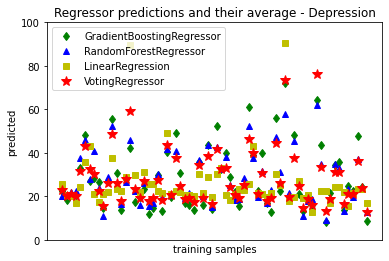

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_knowledge_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_knowledge_train, y_train)
reg2.fit(X_knowledge_train, y_train)
reg3.fit(X_knowledge_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_knowledge_train, y_train)

#predict 
pred1 = reg1.predict(X_knowledge_test)
pred2 = reg2.predict(X_knowledge_test)
pred3 = reg3.predict(X_knowledge_test)
pred4 = ereg.predict(X_knowledge_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_knowledge_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_knowledge_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_knowledge_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_knowledge_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_knowledge_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
lr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
svm_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
rf_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
dtr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
gbr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Abdominal distension
- Abdominal hernia
- Abdominal pain
- Abortion spontaneous
- Accepts_Healthy_volunteers
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#plot predictions 
plt.figure()
plt.plot(lr_y_pred, "gd", label="Linear Regression")
plt.plot(svm_y_pred, "b^", label="Support Vector Regressor")
plt.plot(rf_y_pred, "ys", label="Random Forest Regressor")
plt.plot(dtr_y_pred, "r*", ms=10, label="Decision Tree Regressor")
plt.plot(gbr_y_pred, "bs", label="Gradient Boosting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions - Knowledge Based Feature Selection - Depression")
plt.setp(plt.gca(),ylim=(0,100))

## Anxiety 

### Subset Anxiety Studies / Split into test and train sets

In [ ]:
V4_anxiety_df = V4_master_df[V4_master_df['disease_type'] == "Anxiety"]
V4_anxiety_df = V4_anxiety_df.drop(columns=['disease_type', 'intervention_model_type_Sequential Assignment'])

#split into features and outcome dataframes
X_df = V4_anxiety_df.drop(columns=['percent_attrition'])
y_df = V4_anxiety_df.percent_attrition

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
27,0.0,0.0,0.0,22.0,0.0,5.0,0.0,0.0,14.0,0.0,...,1,1,0,0,0,0,0,1,0,0
29,0.0,0.0,0.0,22.0,0.0,5.0,0.0,0.0,14.0,0.0,...,1,1,0,0,0,0,0,1,0,0
92,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0
94,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0
111,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,...,1,0,0,0,0,0,1,0,1,0
113,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,...,1,0,0,0,0,0,1,0,1,0
125,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
127,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
132,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,...,0,0,1,0,0,0,0,1,0,0
134,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#select all ae columns
ae_df = X_df.iloc[:,9:1962]

#replace all non zero cells with 1
ae_df[ae_df != 0] = 1

#add all columns and select the top ten most prevelant
s = ae_df.sum()
top_ae_table = ae_df[s.sort_values(ascending=False).index[:10]]

#generated list of most prevelant ae
top_ae_table_list = list(top_ae_table.columns)

In [ ]:
#drop all columns that contain only zeros
X_df = X_df.loc[:, (X_df != 0).any(axis=0)]
X_df

,dropout_reason_adverse event,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,Rash,Somnolence,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
27,0.0,22.0,0.0,5.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,0
29,0.0,22.0,0.0,5.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,0
92,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,...,0,1,0,0,1,0,0,1,0,0
94,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,...,0,1,0,0,1,0,0,1,0,0
111,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
113,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
125,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
127,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
132,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,0.0,20.0,...,0,0,0,1,0,0,0,1,0,0
134,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,0.0,20.0,...,0,0,0,1,0,0,0,1,0,0


### Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_df, thresh=4.0):
    variables = list(range(X_df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_df.columns[variables])
    return X_df.iloc[:, variables]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,Rash,Somnolence,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
27,0.0,22.0,0.0,5.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,0
29,0.0,22.0,0.0,5.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,0
92,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,...,0,1,0,0,1,0,0,1,0,0
94,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,...,0,1,0,0,1,0,0,1,0,0
111,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
113,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
125,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
127,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
132,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,0.0,20.0,...,0,0,0,1,0,0,0,1,0,0
134,0.0,0.0,0.0,0.0,4.0,0.0,15.0,0.0,0.0,20.0,...,0,0,0,1,0,0,0,1,0,0


### Corelated Feature Drop

In [ ]:
df_corr = X_df.corr()
df_corr.head()

,dropout_reason_adverse event,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,Rash,Somnolence,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
dropout_reason_adverse event,1.000000,0.003749,0.915385,0.023230,-0.004886,0.054918,0.044829,-0.085009,0.003439,-0.046529,...,-0.085009,0.123810,-0.156451,-0.114503,-0.038475,-0.085009,0.437329,0.090796,-0.049253,-0.085009
dropout_reason_inclusion/exclusion criteria issue,0.003749,1.000000,0.059922,-0.037710,-0.177832,-0.159981,0.407365,-0.134886,-0.099965,-0.178894,...,-0.090720,0.164290,0.347835,-0.172532,-0.096031,-0.134886,0.083692,-0.091795,0.185268,-0.134886
dropout_reason_lack of efficacy,0.915385,0.059922,1.000000,0.082819,0.082437,-0.054967,0.062360,-0.039841,-0.058026,-0.052840,...,-0.039841,0.058026,-0.073324,-0.130032,-0.101430,-0.039841,0.421637,0.087538,-0.073324,-0.039841
dropout_reason_lost to follow-up,0.023230,-0.037710,0.082819,1.000000,-0.148120,-0.171632,-0.213275,0.134261,-0.176355,-0.170855,...,-0.082397,0.153815,-0.161138,0.524785,-0.288571,-0.113348,-0.120897,0.240546,-0.189620,-0.128824
dropout_reason_physician decision,-0.004886,-0.177832,0.082437,-0.148120,1.000000,-0.095545,0.091041,-0.100501,-0.146374,0.281143,...,-0.100501,-0.172204,0.418887,-0.124038,-0.200175,-0.100501,0.050834,0.040592,0.016320,-0.100501


In [ ]:
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_df.columns[columns]
selected_columns
X_df = X_df[selected_columns]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,Rash,Somnolence,Nausea,...,intervention_model_type_Crossover Assignment,intervention_model_type_Parallel Assignment,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female
27,0.0,22.0,5.0,0.0,0.0,14.0,0.0,0.0,0.0,60.0,...,0,1,1,1,0,0,0,0,1,0
29,0.0,22.0,5.0,0.0,0.0,14.0,0.0,0.0,0.0,60.0,...,0,1,1,1,0,0,0,0,1,0
92,0.0,3.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,...,1,0,1,0,0,1,0,0,1,0
94,0.0,3.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,...,1,0,1,0,0,1,0,0,1,0
111,0.0,0.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,1
113,0.0,0.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,1
125,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,1
127,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,0,1
132,0.0,0.0,0.0,4.0,0.0,15.0,0.0,0.0,20.0,0.0,...,0,1,0,0,1,0,0,0,1,0
134,0.0,0.0,0.0,4.0,0.0,15.0,0.0,0.0,20.0,0.0,...,0,1,0,0,1,0,0,0,1,0


Standardize and split data 

In [ ]:
X_df_norm = (X_df-X_df.min())/(X_df.max()-X_df.min())

In [ ]:
X_df_norm.isnull().sum()

dropout_reason_adverse event                          0
dropout_reason_inclusion/exclusion criteria issue     0
dropout_reason_lost to follow-up                      0
dropout_reason_physician decision                     0
dropout_reason_protocol violation                     0
dropout_reason_subject withdrawal                     0
Influenza                                             0
Rash                                                  0
Somnolence                                            0
Nausea                                                0
Fatigue                                               0
Seizure                                               0
Dysuria                                               0
Headache                                              0
Pain in jaw                                           0
Aphasia                                               0
Feeling abnormal                                      0
Musculoskeletal stiffness                       

In [ ]:
X_df_norm.columns.to_series()[np.isinf(X_df_norm).any()]

Series([], dtype: object)

In [ ]:
X_df_norm['study_type_Interventional'] = X_df_norm['study_type_Interventional'].fillna(0)

In [ ]:
mean(y_df)

21.933291946312977

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((29, 51), (8, 51))

### Feature Selection

#### Feature Importance with Gradient Boosting

In [ ]:
# GradientBoostingRegressor will be used for feature importance
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_preds = reg_model.predict(X_test)
r2_score(y_test, y_preds)

0.4288759363250807

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
dropout_reason_inclusion/exclusion criteria issue,0.318439
dropout_reason_lost to follow-up,0.058545
event_type_other,0.045327
Headache,0.040401
study_duration_months,0.038388
Abdominal pain,0.037683
intervention_model_type_Factorial Assignment,0.037326
Genetic,0.034936
Nausea,0.028028
dropout_reason_adverse event,0.025854


In [ ]:
#create list of top 30 features
boost_top_10 = feature_imp.head(10).index.values
boost_top_10_list = list(boost_top_10)

In [ ]:
X_boost_df = X_df[X_df.columns.intersection(boost_top_10_list)]

In [ ]:
# Train/test split:
X_boost_train, X_boost_test, y_train, y_test = train_test_split(X_boost_df, y_df, test_size = 0.2, random_state = 2)

X_boost_train.shape, X_boost_test.shape

((271, 10), (68, 10))

##### Model Set-up

In [ ]:
# Continous outcome prediction:

def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  # Make predictions with model
  y_pred = reg_model.predict(X_test)
  #Metrics
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val}

Linear Regression

In [ ]:
# Linear Regression:

lr_model = LinearRegression()

scores = cross_val_score(lr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([-0.52372859,  0.22300902,  0.40490087,  0.28289511,  0.22152235])

In [ ]:
# k-fold CV (using all the boost variables)
train_and_test(lr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 320.12078109174996, 'R2_Score': 0.27008943892479653}

Random Forest

In [ ]:
# Random Forest Regression:

rfr_model = RandomForestRegressor()

scores = cross_val_score(rfr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.21087431, 0.4829302 , 0.49542987, 0.26260168, 0.45673906])

In [ ]:

train_and_test(rfr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 239.01657569297282, 'R2_Score': 0.455015940310575}

Gradient Boosting

In [ ]:
# Gradient Boost for feature importance:

boost_model = GradientBoostingRegressor(random_state=0)   

scores = cross_val_score(boost_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.11861583, 0.52141256, 0.46201785, 0.23063168, 0.37609487])

In [ ]:
boost_model.fit(X_boost_train, y_train)
y_preds = boost_model.predict(X_boost_test)
r2_score(y_test, y_preds)

0.4156543656927092

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept':[True, False]}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['squared_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
            {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the grid parameters 

#pass in cv=5 for the gridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_boost_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_boost_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_boost_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_boost_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_boost_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
lr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
svm_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
rf_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
dtr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
gbr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

#### Mutual Information Feature Selection 

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()  

print(selector.scores_)   

new_features = X_train.columns[mask]

[1.93329965e-01 2.79787357e-02 0.00000000e+00 2.85353136e-01
 1.12896336e-01 2.04555356e-01 6.47709408e-02 1.89068091e-02
 2.36317673e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14886389e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.31302684e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32252200e-03 1.40305033e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39487101e-02
 7.96625655e-03 0.00000000e+00 9.11215201e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24477243e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80357087e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13094503e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45845098e-03 7.19362761e-03
 0.00000000e+00 0.00000000e+00 2.40973048e-03 7.97151068e-03
 1.65255318e-02 2.68652715e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.78600247e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
X_MI_df = V4_master_df[new_features]

In [ ]:
# Train/test split:
X_MI_train, X_MI_test, y_train, y_test = train_test_split(X_MI_df, y_df, test_size = 0.2, random_state = 2)

X_MI_train.shape, X_MI_test.shape

ValueError: ignored

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_MI_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_MI_train, y_train)
reg2.fit(X_MI_train, y_train)
reg3.fit(X_MI_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_MI_train, y_train)

#predict 
pred1 = reg1.predict(X_boost_test)
pred2 = reg2.predict(X_boost_test)
pred3 = reg3.predict(X_boost_test)
pred4 = ereg.predict(X_boost_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_MI_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_MI_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_MI_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_MI_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_MI_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#### Knowledge Feature Selection

In [ ]:
df_list = list(X_df[['number_of_arms', 'has_dmc', 'number_of_facilities', 'study_duration_months', 'event_type_deaths', 'event_type_other', 'event_type_serious']])

In [ ]:
dropout_list = list(X_df[['dropout_reason_adverse event', 'dropout_reason_inclusion/exclusion criteria issue', 'dropout_reason_lost to follow-up']])

In [ ]:
top_ae_table_list

['Headache',
 'Nausea',
 'Fatigue',
 'Vomiting',
 'Decreased appetite',
 'Diarrhoea',
 'Sedation',
 'Rash',
 'Increased appetite',
 'Palpitations']

In [ ]:
X_knowledge_df = X_df[X_df.columns.intersection(top_ae_table_list+dropout_list+df_list)]

In [ ]:
X_knowledge_norm = (X_knowledge_df-X_knowledge_df.min())/(X_knowledge_df.max()-X_knowledge_df.min())

In [ ]:
# Train/test split:
X_knowledge_train, X_knowledge_test, y_train, y_test = train_test_split(X_knowledge_norm, y_df, test_size = 0.2, random_state = 2)

X_knowledge_train.shape, X_knowledge_test.shape

((271, 20), (68, 20))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueErro

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


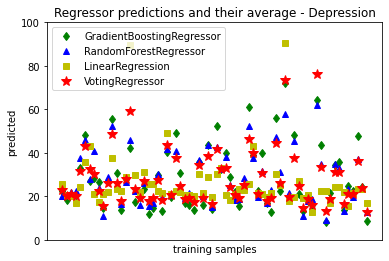

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_knowledge_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_knowledge_train, y_train)
reg2.fit(X_knowledge_train, y_train)
reg3.fit(X_knowledge_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_knowledge_train, y_train)

#predict 
pred1 = reg1.predict(X_knowledge_test)
pred2 = reg2.predict(X_knowledge_test)
pred3 = reg3.predict(X_knowledge_test)
pred4 = ereg.predict(X_knowledge_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_knowledge_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_knowledge_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_knowledge_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_knowledge_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_knowledge_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
lr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
svm_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
rf_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
dtr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
gbr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Abdominal distension
- Abdominal hernia
- Abdominal pain
- Abortion spontaneous
- Accepts_Healthy_volunteers
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#plot predictions 
plt.figure()
plt.plot(lr_y_pred, "gd", label="Linear Regression")
plt.plot(svm_y_pred, "b^", label="Support Vector Regressor")
plt.plot(rf_y_pred, "ys", label="Random Forest Regressor")
plt.plot(dtr_y_pred, "r*", ms=10, label="Decision Tree Regressor")
plt.plot(gbr_y_pred, "bs", label="Gradient Boosting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions - Knowledge Based Feature Selection - Depression")
plt.setp(plt.gca(),ylim=(0,100))

## Bipolar

### Subset Bipolar Studies / Split into test and train sets

In [ ]:
V4_bipolar_df = V4_master_df[V4_master_df['disease_type'] == "Bipolar"]
V4_bipolar_df = V4_bipolar_df.drop(columns=['disease_type', 'intervention_model_type_Sequential Assignment'])

#split into features and outcome dataframes
X_df = V4_bipolar_df.drop(columns=['percent_attrition'])
y_df = V4_bipolar_df.percent_attrition

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((29, 2010), (8, 2010))

In [ ]:
#select all ae columns
ae_df = X_df.iloc[:,9:1962]

#replace all non zero cells with 1
ae_df[ae_df != 0] = 1

#add all columns and select the top ten most prevelant
s = ae_df.sum()
top_ae_table = ae_df[s.sort_values(ascending=False).index[:10]]

#generated list of most prevelant ae
top_ae_table_list = list(top_ae_table.columns)

In [ ]:
X_df = X_df.loc[:, (X_df != 0).any(axis=0)]
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Rash,Pain,...,intervention_model_type_Parallel Assignment,intervention_model_type_Single Group Assignment,allocation_type_Non-Randomized,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Triple,study_gender_eligibility_All
37,1.0,0.0,0.0,0.0,33.0,0.0,0.0,9.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,1
39,1.0,0.0,0.0,0.0,33.0,0.0,0.0,9.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,1
54,6.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
56,12.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
65,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
67,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
170,0.0,0.0,6.0,0.0,19.0,0.0,1.0,11.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
172,0.0,0.0,6.0,0.0,19.0,0.0,1.0,11.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1


### Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_df, thresh=4.0):
    variables = list(range(X_df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_df.columns[variables])
    return X_df.iloc[:, variables]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Rash,Pain,...,intervention_model_type_Parallel Assignment,intervention_model_type_Single Group Assignment,allocation_type_Non-Randomized,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Triple,study_gender_eligibility_All
37,1.0,0.0,0.0,0.0,33.0,0.0,0.0,9.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,1
39,1.0,0.0,0.0,0.0,33.0,0.0,0.0,9.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,1
54,6.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
56,12.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
65,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
67,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
170,0.0,0.0,6.0,0.0,19.0,0.0,1.0,11.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
172,0.0,0.0,6.0,0.0,19.0,0.0,1.0,11.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1


### Corelated Feature Drop

In [ ]:
df_corr = X_df.corr()
df_corr.head()

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Rash,Pain,...,intervention_model_type_Parallel Assignment,intervention_model_type_Single Group Assignment,allocation_type_Non-Randomized,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Triple,study_gender_eligibility_All
dropout_reason_adverse event,1.000000,0.293471,0.863580,0.886992,0.536462,0.171939,0.848965,0.701763,-0.116910,-0.133233,...,0.027384,0.071150,-0.092892,0.182991,-0.142866,-0.101549,0.105856,0.086947,-0.126722,NaN
dropout_reason_consent withdrawn,0.293471,1.000000,0.372603,0.261720,0.410323,-0.119617,0.190506,-0.163261,-0.083081,-0.083081,...,0.240793,-0.197045,-0.057926,-0.197045,0.211515,-0.137383,-0.226065,0.501652,-0.197045,NaN
dropout_reason_inclusion/exclusion criteria issue,0.863580,0.372603,1.000000,0.664121,0.487182,0.248795,0.638815,0.583045,-0.005616,-0.161451,...,0.072732,0.020903,-0.112566,0.192012,-0.144398,-0.198257,0.100363,0.027635,0.020903,NaN
dropout_reason_lack of efficacy,0.886992,0.261720,0.664121,1.000000,0.457765,-0.005027,0.880176,0.606561,-0.130905,-0.130905,...,0.025506,0.064935,-0.091269,0.075660,-0.039768,-0.054934,0.006259,0.141610,-0.117404,NaN
dropout_reason_lost to follow-up,0.536462,0.410323,0.487182,0.457765,1.000000,0.234654,0.542978,0.498929,-0.172239,-0.046872,...,0.277149,-0.177240,-0.018112,-0.045091,0.050176,-0.160429,-0.091358,0.343572,-0.149709,NaN


In [ ]:
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_df.columns[columns]
selected_columns
X_df = X_df[selected_columns]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Rash,Pain,...,intervention_model_type_Parallel Assignment,intervention_model_type_Single Group Assignment,allocation_type_Non-Randomized,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Triple,study_gender_eligibility_All
37,1.0,0.0,0.0,0.0,33.0,0.0,0.0,9.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,1
39,1.0,0.0,0.0,0.0,33.0,0.0,0.0,9.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,1
54,6.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
56,12.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
65,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
67,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
170,0.0,0.0,6.0,0.0,19.0,0.0,1.0,11.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1
172,0.0,0.0,6.0,0.0,19.0,0.0,1.0,11.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,1


Standardize and split data 

In [ ]:
X_df_norm = (X_df-X_df.min())/(X_df.max()-X_df.min())

In [ ]:
X_df_norm.columns.to_series()[np.isinf(X_df_norm).any()]

Series([], dtype: object)

In [ ]:
X_df_norm.isnull().sum()

dropout_reason_adverse event                          0
dropout_reason_consent withdrawn                      0
dropout_reason_inclusion/exclusion criteria issue     0
dropout_reason_lack of efficacy                       0
dropout_reason_lost to follow-up                      0
                                                     ..
masking_type_Double                                   0
masking_type_None (Open Label)                        0
masking_type_Quadruple                                0
masking_type_Triple                                   0
study_gender_eligibility_All                         37
Length: 61, dtype: int64

In [ ]:
X_df_norm = X_df_norm.fillna(0)

In [ ]:
count = np.isnan(X_df_norm).values.sum()

In [ ]:
mean(y_df)

30.43135113148484

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((29, 61), (8, 61))

### Feature Selection

#### Feature Importance with Gradient Boosting

In [ ]:
# GradientBoostingRegressor will be used for feature importance
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_preds = reg_model.predict(X_test)
r2_score(y_test, y_preds)

0.4288759363250807

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
dropout_reason_inclusion/exclusion criteria issue,0.318439
dropout_reason_lost to follow-up,0.058545
event_type_other,0.045327
Headache,0.040401
study_duration_months,0.038388
Abdominal pain,0.037683
intervention_model_type_Factorial Assignment,0.037326
Genetic,0.034936
Nausea,0.028028
dropout_reason_adverse event,0.025854


In [ ]:
#create list of top 30 features
boost_top_10 = feature_imp.head(10).index.values
boost_top_10_list = list(boost_top_10)

In [ ]:
X_boost_df = X_df[X_df.columns.intersection(boost_top_10_list)]

In [ ]:
# Train/test split:
X_boost_train, X_boost_test, y_train, y_test = train_test_split(X_boost_df, y_df, test_size = 0.2, random_state = 2)

X_boost_train.shape, X_boost_test.shape

((271, 10), (68, 10))

##### Model Set-up

In [ ]:
# Continous outcome prediction:

def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  # Make predictions with model
  y_pred = reg_model.predict(X_test)
  #Metrics
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val}

Linear Regression

In [ ]:
# Linear Regression:

lr_model = LinearRegression()

scores = cross_val_score(lr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([-0.52372859,  0.22300902,  0.40490087,  0.28289511,  0.22152235])

In [ ]:
# k-fold CV (using all the boost variables)
train_and_test(lr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 320.12078109174996, 'R2_Score': 0.27008943892479653}

Random Forest

In [ ]:
# Random Forest Regression:

rfr_model = RandomForestRegressor()

scores = cross_val_score(rfr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.21087431, 0.4829302 , 0.49542987, 0.26260168, 0.45673906])

In [ ]:

train_and_test(rfr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 239.01657569297282, 'R2_Score': 0.455015940310575}

Gradient Boosting

In [ ]:
# Gradient Boost for feature importance:

boost_model = GradientBoostingRegressor(random_state=0)   

scores = cross_val_score(boost_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.11861583, 0.52141256, 0.46201785, 0.23063168, 0.37609487])

In [ ]:
boost_model.fit(X_boost_train, y_train)
y_preds = boost_model.predict(X_boost_test)
r2_score(y_test, y_preds)

0.4156543656927092

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept':[True, False]}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['squared_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
            {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the grid parameters 

#pass in cv=5 for the gridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_boost_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_boost_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_boost_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_boost_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_boost_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
lr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
svm_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
rf_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
dtr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
gbr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

#### Mutual Information Feature Selection 

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()  

print(selector.scores_)   

new_features = X_train.columns[mask]

[1.93329965e-01 2.79787357e-02 0.00000000e+00 2.85353136e-01
 1.12896336e-01 2.04555356e-01 6.47709408e-02 1.89068091e-02
 2.36317673e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14886389e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.31302684e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32252200e-03 1.40305033e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39487101e-02
 7.96625655e-03 0.00000000e+00 9.11215201e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24477243e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80357087e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13094503e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45845098e-03 7.19362761e-03
 0.00000000e+00 0.00000000e+00 2.40973048e-03 7.97151068e-03
 1.65255318e-02 2.68652715e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.78600247e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
X_MI_df = V4_master_df[new_features]

In [ ]:
# Train/test split:
X_MI_train, X_MI_test, y_train, y_test = train_test_split(X_MI_df, y_df, test_size = 0.2, random_state = 2)

X_MI_train.shape, X_MI_test.shape

ValueError: ignored

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_MI_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_MI_train, y_train)
reg2.fit(X_MI_train, y_train)
reg3.fit(X_MI_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_MI_train, y_train)

#predict 
pred1 = reg1.predict(X_boost_test)
pred2 = reg2.predict(X_boost_test)
pred3 = reg3.predict(X_boost_test)
pred4 = ereg.predict(X_boost_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_MI_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_MI_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_MI_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_MI_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_MI_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#### Knowledge Feature Selection

In [ ]:
df_list = list(X_df[['number_of_arms', 'has_dmc', 'number_of_facilities', 'study_duration_months', 'event_type_deaths', 'event_type_other', 'event_type_serious']])

In [ ]:
dropout_list = list(X_df[['dropout_reason_adverse event', 'dropout_reason_inclusion/exclusion criteria issue', 'dropout_reason_lost to follow-up']])

In [ ]:
top_ae_table_list

['Headache',
 'Nausea',
 'Fatigue',
 'Vomiting',
 'Decreased appetite',
 'Diarrhoea',
 'Sedation',
 'Rash',
 'Increased appetite',
 'Palpitations']

In [ ]:
X_knowledge_df = X_df[X_df.columns.intersection(top_ae_table_list+dropout_list+df_list)]

In [ ]:
X_knowledge_norm = (X_knowledge_df-X_knowledge_df.min())/(X_knowledge_df.max()-X_knowledge_df.min())

In [ ]:
# Train/test split:
X_knowledge_train, X_knowledge_test, y_train, y_test = train_test_split(X_knowledge_norm, y_df, test_size = 0.2, random_state = 2)

X_knowledge_train.shape, X_knowledge_test.shape

((271, 20), (68, 20))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueErro

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


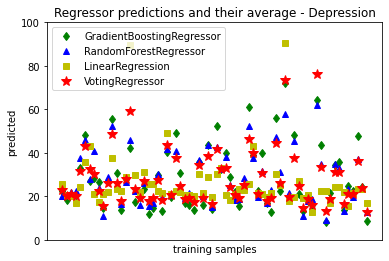

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_knowledge_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_knowledge_train, y_train)
reg2.fit(X_knowledge_train, y_train)
reg3.fit(X_knowledge_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_knowledge_train, y_train)

#predict 
pred1 = reg1.predict(X_knowledge_test)
pred2 = reg2.predict(X_knowledge_test)
pred3 = reg3.predict(X_knowledge_test)
pred4 = ereg.predict(X_knowledge_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_knowledge_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_knowledge_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_knowledge_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_knowledge_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_knowledge_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
lr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
svm_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
rf_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
dtr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
gbr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Abdominal distension
- Abdominal hernia
- Abdominal pain
- Abortion spontaneous
- Accepts_Healthy_volunteers
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#plot predictions 
plt.figure()
plt.plot(lr_y_pred, "gd", label="Linear Regression")
plt.plot(svm_y_pred, "b^", label="Support Vector Regressor")
plt.plot(rf_y_pred, "ys", label="Random Forest Regressor")
plt.plot(dtr_y_pred, "r*", ms=10, label="Decision Tree Regressor")
plt.plot(gbr_y_pred, "bs", label="Gradient Boosting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions - Knowledge Based Feature Selection - Depression")
plt.setp(plt.gca(),ylim=(0,100))

## Alzheimer's Disease

### Subset Alzheimer's Disease Studies / Split into test and train sets

In [ ]:
V4_alzheimers_df = V4_master_df[V4_master_df['disease_type'] == "Alzheimer's Disease"]
V4_alzheimers_df = V4_alzheimers_df.drop(columns=['disease_type', 'intervention_model_type_Sequential Assignment'])

#split into features and outcome dataframes
X_df = V4_alzheimers_df.drop(columns=['percent_attrition'])
y_df = V4_alzheimers_df.percent_attrition

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((154, 2010), (39, 2010))

In [ ]:
#select all ae columns
ae_df = X_df.iloc[:,9:1962]

#replace all non zero cells with 1
ae_df[ae_df != 0] = 1

#add all columns and select the top ten most prevelant
s = ae_df.sum()
top_ae_table = ae_df[s.sort_values(ascending=False).index[:10]]

#generated list of most prevelant ae
top_ae_table_list = list(top_ae_table.columns)

In [ ]:
X_df = X_df.loc[:, (X_df != 0).any(axis=0)]
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
269,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
271,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
316,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
318,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
325,0.0,0.0,1.0,26.0,0.0,24.0,0.0,0.0,21.0,0.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,1,0,0,0,0,1,0
612,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,1,0
614,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,7.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_df, thresh=4.0):
    variables = list(range(X_df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_df.columns[variables])
    return X_df.iloc[:, variables]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
269,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
271,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
316,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
318,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,1,0,0,1,0,0,0,0,1,0
325,0.0,0.0,1.0,26.0,0.0,24.0,0.0,0.0,21.0,0.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,1,0,0,0,0,1,0
612,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,1,0
614,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,7.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Corelated Feature Drop

In [ ]:
df_corr = X_df.corr()
df_corr.head()

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
dropout_reason_adverse event,1.000000,0.237846,0.298972,0.565721,0.197587,0.224658,0.240606,0.589975,0.588069,0.003276,...,-0.080608,0.123205,-0.044521,-0.081317,-0.014257,0.137459,-0.103984,0.033563,0.036087,-0.036087
dropout_reason_consent withdrawn,0.237846,1.000000,0.138402,0.370100,0.080904,0.055113,-0.012491,0.065628,0.000652,-0.007568,...,-0.062143,0.090372,0.030074,-0.085003,-0.023521,0.138742,-0.033621,-0.075278,0.011668,-0.011668
dropout_reason_death,0.298972,0.138402,1.000000,0.181400,0.086247,0.162898,0.227897,0.138321,0.464115,0.069795,...,-0.012952,0.067144,-0.061548,0.006551,-0.018748,0.111885,-0.035637,-0.050367,0.020343,-0.020343
dropout_reason_inclusion/exclusion criteria issue,0.565721,0.370100,0.181400,1.000000,0.163769,0.202686,0.025720,0.089250,0.409613,0.056653,...,-0.054126,0.086368,-0.055511,-0.065199,-0.033962,0.139876,-0.049354,0.003190,0.021433,-0.021433
dropout_reason_lack of efficacy,0.197587,0.080904,0.086247,0.163769,1.000000,0.046159,-0.012844,-0.007926,0.128763,-0.001321,...,0.086281,-0.060349,-0.033337,0.077214,-0.009485,0.030435,-0.042828,-0.062107,0.014863,-0.014863


In [ ]:
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_df.columns[columns]
selected_columns
X_df = X_df[selected_columns]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Non-Randomized,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
269,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,...,0,1,0,0,1,0,0,0,1,0
271,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,...,0,1,0,0,1,0,0,0,1,0
316,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,0,1,0,0,1,0,0,0,1,0
318,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,0,1,0,0,1,0,0,0,1,0
325,0.0,0.0,1.0,26.0,0.0,24.0,0.0,0.0,21.0,0.0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1,0,0,0,1,0,0,0,1,0
612,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0,0,1,1,0,0,0,0,0,1
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,1,0
614,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,7.0,0.0,...,1,0,0,0,1,0,0,0,1,0


Standardize and split data 

In [ ]:
X_df_norm = (X_df-X_df.min())/(X_df.max()-X_df.min())

In [ ]:
X_df_norm.columns.to_series()[np.isinf(X_df_norm).any()]

Series([], dtype: object)

In [ ]:
X_df_norm.isnull().sum()

dropout_reason_adverse event                         0
dropout_reason_consent withdrawn                     0
dropout_reason_death                                 0
dropout_reason_inclusion/exclusion criteria issue    0
dropout_reason_lack of efficacy                      0
                                                    ..
masking_type_Quadruple                               0
masking_type_Single                                  0
masking_type_Triple                                  0
study_gender_eligibility_All                         0
study_gender_eligibility_Male                        0
Length: 555, dtype: int64

In [ ]:
X_df_norm['study_gender_eligibility_All'] = X_df_norm['study_gender_eligibility_All'].fillna(0)

In [ ]:
mean(y_df)

30.890330802202524

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((154, 555), (39, 555))

### Feature Selection

#### Feature Importance with Gradient Boosting

In [ ]:
# GradientBoostingRegressor will be used for feature importance
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_preds = reg_model.predict(X_test)
r2_score(y_test, y_preds)

0.4288759363250807

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
dropout_reason_inclusion/exclusion criteria issue,0.318439
dropout_reason_lost to follow-up,0.058545
event_type_other,0.045327
Headache,0.040401
study_duration_months,0.038388
Abdominal pain,0.037683
intervention_model_type_Factorial Assignment,0.037326
Genetic,0.034936
Nausea,0.028028
dropout_reason_adverse event,0.025854


In [ ]:
#create list of top 30 features
boost_top_10 = feature_imp.head(10).index.values
boost_top_10_list = list(boost_top_10)

In [ ]:
X_boost_df = X_df[X_df.columns.intersection(boost_top_10_list)]

In [ ]:
# Train/test split:
X_boost_train, X_boost_test, y_train, y_test = train_test_split(X_boost_df, y_df, test_size = 0.2, random_state = 2)

X_boost_train.shape, X_boost_test.shape

((271, 10), (68, 10))

##### Model Set-up

In [ ]:
# Continous outcome prediction:

def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  # Make predictions with model
  y_pred = reg_model.predict(X_test)
  #Metrics
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val}

Linear Regression

In [ ]:
# Linear Regression:

lr_model = LinearRegression()

scores = cross_val_score(lr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([-0.52372859,  0.22300902,  0.40490087,  0.28289511,  0.22152235])

In [ ]:
# k-fold CV (using all the boost variables)
train_and_test(lr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 320.12078109174996, 'R2_Score': 0.27008943892479653}

Random Forest

In [ ]:
# Random Forest Regression:

rfr_model = RandomForestRegressor()

scores = cross_val_score(rfr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.21087431, 0.4829302 , 0.49542987, 0.26260168, 0.45673906])

In [ ]:

train_and_test(rfr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 239.01657569297282, 'R2_Score': 0.455015940310575}

Gradient Boosting

In [ ]:
# Gradient Boost for feature importance:

boost_model = GradientBoostingRegressor(random_state=0)   

scores = cross_val_score(boost_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.11861583, 0.52141256, 0.46201785, 0.23063168, 0.37609487])

In [ ]:
boost_model.fit(X_boost_train, y_train)
y_preds = boost_model.predict(X_boost_test)
r2_score(y_test, y_preds)

0.4156543656927092

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept':[True, False]}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['squared_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
            {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the grid parameters 

#pass in cv=5 for the gridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_boost_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_boost_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_boost_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_boost_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_boost_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
lr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
svm_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
rf_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
dtr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
gbr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

#### Mutual Information Feature Selection 

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()  

print(selector.scores_)   

new_features = X_train.columns[mask]

[1.93329965e-01 2.79787357e-02 0.00000000e+00 2.85353136e-01
 1.12896336e-01 2.04555356e-01 6.47709408e-02 1.89068091e-02
 2.36317673e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14886389e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.31302684e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32252200e-03 1.40305033e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39487101e-02
 7.96625655e-03 0.00000000e+00 9.11215201e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24477243e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80357087e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13094503e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45845098e-03 7.19362761e-03
 0.00000000e+00 0.00000000e+00 2.40973048e-03 7.97151068e-03
 1.65255318e-02 2.68652715e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.78600247e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
X_MI_df = V4_master_df[new_features]

In [ ]:
# Train/test split:
X_MI_train, X_MI_test, y_train, y_test = train_test_split(X_MI_df, y_df, test_size = 0.2, random_state = 2)

X_MI_train.shape, X_MI_test.shape

ValueError: ignored

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_MI_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_MI_train, y_train)
reg2.fit(X_MI_train, y_train)
reg3.fit(X_MI_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_MI_train, y_train)

#predict 
pred1 = reg1.predict(X_boost_test)
pred2 = reg2.predict(X_boost_test)
pred3 = reg3.predict(X_boost_test)
pred4 = ereg.predict(X_boost_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_MI_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_MI_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_MI_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_MI_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_MI_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#### Knowledge Feature Selection

In [ ]:
df_list = list(X_df[['number_of_arms', 'has_dmc', 'number_of_facilities', 'study_duration_months', 'event_type_deaths', 'event_type_other', 'event_type_serious']])

In [ ]:
dropout_list = list(X_df[['dropout_reason_adverse event', 'dropout_reason_inclusion/exclusion criteria issue', 'dropout_reason_lost to follow-up']])

In [ ]:
top_ae_table_list

['Headache',
 'Nausea',
 'Fatigue',
 'Vomiting',
 'Decreased appetite',
 'Diarrhoea',
 'Sedation',
 'Rash',
 'Increased appetite',
 'Palpitations']

In [ ]:
X_knowledge_df = X_df[X_df.columns.intersection(top_ae_table_list+dropout_list+df_list)]

In [ ]:
X_knowledge_norm = (X_knowledge_df-X_knowledge_df.min())/(X_knowledge_df.max()-X_knowledge_df.min())

In [ ]:
# Train/test split:
X_knowledge_train, X_knowledge_test, y_train, y_test = train_test_split(X_knowledge_norm, y_df, test_size = 0.2, random_state = 2)

X_knowledge_train.shape, X_knowledge_test.shape

((271, 20), (68, 20))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueErro

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


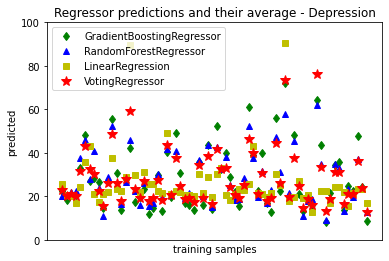

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_knowledge_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_knowledge_train, y_train)
reg2.fit(X_knowledge_train, y_train)
reg3.fit(X_knowledge_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_knowledge_train, y_train)

#predict 
pred1 = reg1.predict(X_knowledge_test)
pred2 = reg2.predict(X_knowledge_test)
pred3 = reg3.predict(X_knowledge_test)
pred4 = ereg.predict(X_knowledge_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_knowledge_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_knowledge_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_knowledge_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_knowledge_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_knowledge_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
lr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
svm_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
rf_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
dtr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
gbr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Abdominal distension
- Abdominal hernia
- Abdominal pain
- Abortion spontaneous
- Accepts_Healthy_volunteers
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#plot predictions 
plt.figure()
plt.plot(lr_y_pred, "gd", label="Linear Regression")
plt.plot(svm_y_pred, "b^", label="Support Vector Regressor")
plt.plot(rf_y_pred, "ys", label="Random Forest Regressor")
plt.plot(dtr_y_pred, "r*", ms=10, label="Decision Tree Regressor")
plt.plot(gbr_y_pred, "bs", label="Gradient Boosting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions - Knowledge Based Feature Selection - Depression")
plt.setp(plt.gca(),ylim=(0,100))

## Parkinson's Disease

### Subset Parkinson's Disease Studies / Split into test and train sets

In [ ]:
V4_parkinsons_df = V4_master_df[V4_master_df['disease_type'] == "Parkinson's Disease"]
V4_parkinsons_df = V4_parkinsons_df.drop(columns=['disease_type', 'intervention_model_type_Sequential Assignment'])

#split into features and outcome dataframes
X_df = V4_parkinsons_df.drop(columns=['percent_attrition'])
y_df = V4_parkinsons_df.percent_attrition

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((153, 2010), (39, 2010))

In [ ]:
#select all ae columns
ae_df = X_df.iloc[:,9:1962]

#replace all non zero cells with 1
ae_df[ae_df != 0] = 1

#add all columns and select the top ten most prevelant
s = ae_df.sum()
top_ae_table = ae_df[s.sort_values(ascending=False).index[:10]]

#generated list of most prevelant ae
top_ae_table_list = list(top_ae_table.columns)

In [ ]:
X_df = X_df.loc[:, (X_df != 0).any(axis=0)]
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Pain,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,1,0,0,0,0,0,1,1,0
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,1,0,0,0,0,0,1,1,0
6,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,1,0,0,0,1,0,0,1,0
8,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,1,0,0,0,1,0,0,1,0
23,26.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,1,0
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,1,0
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0


### Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_df, thresh=4.0):
    variables = list(range(X_df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_df.columns[variables])
    return X_df.iloc[:, variables]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Pain,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,1,0,0,0,0,0,1,1,0
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,1,0,0,0,0,0,1,1,0
6,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,1,0,0,0,1,0,0,1,0
8,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,1,0,0,0,1,0,0,1,0
23,26.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,1,0
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,1,0
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0


### Corelated Feature Drop

In [ ]:
df_corr = X_df.corr()
df_corr.head()

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Pain,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Male
dropout_reason_adverse event,1.000000,0.247704,0.172140,0.292774,0.565511,0.519460,0.116031,0.444213,0.406372,-0.045369,...,0.025324,-0.110175,-0.028622,0.010587,0.217556,-0.036255,-0.114037,-0.042283,-0.177064,0.177064
dropout_reason_consent withdrawn,0.247704,1.000000,-0.019762,0.658540,0.374822,0.024945,0.055017,0.019019,-0.063114,-0.013167,...,-0.029783,-0.021405,-0.061577,0.032233,-0.042035,0.056451,-0.030266,-0.011564,-0.445330,0.445330
dropout_reason_death,0.172140,-0.019762,1.000000,0.450501,0.082455,0.367129,0.752763,0.214624,0.568245,0.896399,...,0.025685,-0.006003,-0.042504,-0.031719,0.112206,0.049206,-0.018054,-0.060669,0.012203,-0.012203
dropout_reason_inclusion/exclusion criteria issue,0.292774,0.658540,0.450501,1.000000,0.407113,0.290651,0.479400,0.167418,0.396212,0.490699,...,-0.032734,-0.029209,-0.048934,-0.019920,0.049246,0.074917,-0.049471,-0.038785,-0.522889,0.522889
dropout_reason_lack of efficacy,0.565511,0.374822,0.082455,0.407113,1.000000,0.265932,0.172564,0.277914,0.058297,-0.026600,...,0.051942,-0.164624,-0.098778,0.056347,0.163361,0.000593,-0.058774,-0.076235,-0.755633,0.755633


In [ ]:
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_df.columns[columns]
selected_columns
X_df = X_df[selected_columns]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Pain,...,intervention_model_type_Single Group Assignment,allocation_type_Non-Randomized,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,0,0,1,0,0,0,0,1,1
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,0,0,1,0,0,0,0,1,1
6,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,0,0,1,0,0,1,0,0,1
8,10.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0,0,0,1,0,0,1,0,0,1
23,26.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0,0,1
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,1
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,1,0,0,1,0,0,0,1
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1


Standardize and split data 

In [ ]:
X_df_norm = (X_df-X_df.min())/(X_df.max()-X_df.min())

In [ ]:
mean(y_df)

22.654745503505154

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((153, 352), (39, 352))

### Feature Selection

#### Feature Importance with Gradient Boosting

In [ ]:
# GradientBoostingRegressor will be used for feature importance
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_preds = reg_model.predict(X_test)
r2_score(y_test, y_preds)

0.4288759363250807

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
dropout_reason_inclusion/exclusion criteria issue,0.318439
dropout_reason_lost to follow-up,0.058545
event_type_other,0.045327
Headache,0.040401
study_duration_months,0.038388
Abdominal pain,0.037683
intervention_model_type_Factorial Assignment,0.037326
Genetic,0.034936
Nausea,0.028028
dropout_reason_adverse event,0.025854


In [ ]:
#create list of top 30 features
boost_top_10 = feature_imp.head(10).index.values
boost_top_10_list = list(boost_top_10)

In [ ]:
X_boost_df = X_df[X_df.columns.intersection(boost_top_10_list)]

In [ ]:
# Train/test split:
X_boost_train, X_boost_test, y_train, y_test = train_test_split(X_boost_df, y_df, test_size = 0.2, random_state = 2)

X_boost_train.shape, X_boost_test.shape

((271, 10), (68, 10))

##### Model Set-up

In [ ]:
# Continous outcome prediction:

def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  # Make predictions with model
  y_pred = reg_model.predict(X_test)
  #Metrics
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val}

Linear Regression

In [ ]:
# Linear Regression:

lr_model = LinearRegression()

scores = cross_val_score(lr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([-0.52372859,  0.22300902,  0.40490087,  0.28289511,  0.22152235])

In [ ]:
# k-fold CV (using all the boost variables)
train_and_test(lr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 320.12078109174996, 'R2_Score': 0.27008943892479653}

Random Forest

In [ ]:
# Random Forest Regression:

rfr_model = RandomForestRegressor()

scores = cross_val_score(rfr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.21087431, 0.4829302 , 0.49542987, 0.26260168, 0.45673906])

In [ ]:

train_and_test(rfr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 239.01657569297282, 'R2_Score': 0.455015940310575}

Gradient Boosting

In [ ]:
# Gradient Boost for feature importance:

boost_model = GradientBoostingRegressor(random_state=0)   

scores = cross_val_score(boost_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.11861583, 0.52141256, 0.46201785, 0.23063168, 0.37609487])

In [ ]:
boost_model.fit(X_boost_train, y_train)
y_preds = boost_model.predict(X_boost_test)
r2_score(y_test, y_preds)

0.4156543656927092

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept':[True, False]}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['squared_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
            {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the grid parameters 

#pass in cv=5 for the gridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_boost_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_boost_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_boost_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_boost_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_boost_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
lr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
svm_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
rf_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
dtr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
gbr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

#### Mutual Information Feature Selection 

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()  

print(selector.scores_)   

new_features = X_train.columns[mask]

[1.93329965e-01 2.79787357e-02 0.00000000e+00 2.85353136e-01
 1.12896336e-01 2.04555356e-01 6.47709408e-02 1.89068091e-02
 2.36317673e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14886389e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.31302684e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32252200e-03 1.40305033e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39487101e-02
 7.96625655e-03 0.00000000e+00 9.11215201e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24477243e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80357087e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13094503e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45845098e-03 7.19362761e-03
 0.00000000e+00 0.00000000e+00 2.40973048e-03 7.97151068e-03
 1.65255318e-02 2.68652715e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.78600247e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
X_MI_df = V4_master_df[new_features]

In [ ]:
# Train/test split:
X_MI_train, X_MI_test, y_train, y_test = train_test_split(X_MI_df, y_df, test_size = 0.2, random_state = 2)

X_MI_train.shape, X_MI_test.shape

ValueError: ignored

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_MI_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_MI_train, y_train)
reg2.fit(X_MI_train, y_train)
reg3.fit(X_MI_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_MI_train, y_train)

#predict 
pred1 = reg1.predict(X_boost_test)
pred2 = reg2.predict(X_boost_test)
pred3 = reg3.predict(X_boost_test)
pred4 = ereg.predict(X_boost_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_MI_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_MI_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_MI_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_MI_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_MI_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#### Knowledge Feature Selection

In [ ]:
df_list = list(X_df[['number_of_arms', 'has_dmc', 'number_of_facilities', 'study_duration_months', 'event_type_deaths', 'event_type_other', 'event_type_serious']])

In [ ]:
dropout_list = list(X_df[['dropout_reason_adverse event', 'dropout_reason_inclusion/exclusion criteria issue', 'dropout_reason_lost to follow-up']])

In [ ]:
top_ae_table_list

['Headache',
 'Nausea',
 'Fatigue',
 'Vomiting',
 'Decreased appetite',
 'Diarrhoea',
 'Sedation',
 'Rash',
 'Increased appetite',
 'Palpitations']

In [ ]:
X_knowledge_df = X_df[X_df.columns.intersection(top_ae_table_list+dropout_list+df_list)]

In [ ]:
X_knowledge_norm = (X_knowledge_df-X_knowledge_df.min())/(X_knowledge_df.max()-X_knowledge_df.min())

In [ ]:
# Train/test split:
X_knowledge_train, X_knowledge_test, y_train, y_test = train_test_split(X_knowledge_norm, y_df, test_size = 0.2, random_state = 2)

X_knowledge_train.shape, X_knowledge_test.shape

((271, 20), (68, 20))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueErro

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


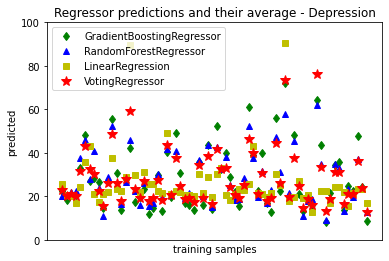

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_knowledge_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_knowledge_train, y_train)
reg2.fit(X_knowledge_train, y_train)
reg3.fit(X_knowledge_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_knowledge_train, y_train)

#predict 
pred1 = reg1.predict(X_knowledge_test)
pred2 = reg2.predict(X_knowledge_test)
pred3 = reg3.predict(X_knowledge_test)
pred4 = ereg.predict(X_knowledge_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_knowledge_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_knowledge_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_knowledge_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_knowledge_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_knowledge_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
lr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
svm_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
rf_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
dtr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
gbr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Abdominal distension
- Abdominal hernia
- Abdominal pain
- Abortion spontaneous
- Accepts_Healthy_volunteers
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#plot predictions 
plt.figure()
plt.plot(lr_y_pred, "gd", label="Linear Regression")
plt.plot(svm_y_pred, "b^", label="Support Vector Regressor")
plt.plot(rf_y_pred, "ys", label="Random Forest Regressor")
plt.plot(dtr_y_pred, "r*", ms=10, label="Decision Tree Regressor")
plt.plot(gbr_y_pred, "bs", label="Gradient Boosting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions - Knowledge Based Feature Selection - Depression")
plt.setp(plt.gca(),ylim=(0,100))

## Master 

### Subset Master Studies / Split into test and train sets

In [ ]:
#split into features and outcome dataframes
X_df = V4_master_df.drop(columns=['percent_attrition', 'disease_type', 'intervention_model_type_Sequential Assignment'])

y_df = V4_master_df.percent_attrition

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((640, 2010), (160, 2010))

In [ ]:
#select all ae columns
ae_df = X_df.iloc[:,9:1962]

#replace all non zero cells with 1
ae_df[ae_df != 0] = 1

#add all columns and select the top ten most prevelant
s = ae_df.sum()
top_ae_table = ae_df[s.sort_values(ascending=False).index[:10]]

#generated list of most prevelant ae
top_ae_table_list = list(top_ae_table.columns)

In [ ]:
X_df = X_df.loc[:, (X_df != 0).any(axis=0)]
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0


### Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_df, thresh=4.0):
    variables = list(range(X_df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_df.columns[variables])
    return X_df.iloc[:, variables]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0


### Corelated Feature Drop

In [ ]:
df_corr = X_df.corr()
df_corr.head()

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Not Reported,masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
dropout_reason_adverse event,1.000000,0.241159,0.247470,0.506430,0.378847,0.426010,0.193515,0.493697,0.590873,0.015188,...,0.006793,-0.033173,-0.032918,0.059376,0.058112,-0.101457,0.031059,0.064146,-0.063154,-0.017771
dropout_reason_consent withdrawn,0.241159,1.000000,0.081087,0.310453,0.086490,0.115868,-0.006455,0.168437,-0.046482,-0.003456,...,0.013981,0.013054,-0.025358,-0.029537,0.053218,-0.037200,-0.015078,-0.003165,-0.032211,0.062652
dropout_reason_death,0.247470,0.081087,1.000000,0.228369,0.018147,0.114569,0.236183,0.028040,0.374674,0.087721,...,0.026005,-0.031457,-0.007997,0.024060,0.056774,-0.014566,-0.031492,0.033528,-0.028812,-0.016628
dropout_reason_inclusion/exclusion criteria issue,0.506430,0.310453,0.228369,1.000000,0.146560,0.179957,0.053016,0.106933,0.365794,0.074414,...,0.017235,-0.024001,-0.030071,-0.009944,0.072187,-0.036975,-0.003614,0.017644,-0.033793,0.023828
dropout_reason_lack of efficacy,0.378847,0.086490,0.018147,0.146560,1.000000,0.309769,-0.008737,0.248701,0.263023,-0.012213,...,-0.013438,-0.007317,0.043806,0.012859,0.014162,-0.048064,-0.044471,-0.001511,-0.024662,0.046147


In [ ]:
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_df.columns[columns]
selected_columns
X_df = X_df[selected_columns]

In [ ]:
X_df

,dropout_reason_adverse event,dropout_reason_consent withdrawn,dropout_reason_death,dropout_reason_inclusion/exclusion criteria issue,dropout_reason_lack of efficacy,dropout_reason_lost to follow-up,dropout_reason_physician decision,dropout_reason_protocol violation,dropout_reason_subject withdrawal,Influenza,...,allocation_type_Not Reported,allocation_type_Randomized,masking_type_Double,masking_type_None (Open Label),masking_type_Quadruple,masking_type_Single,masking_type_Triple,study_gender_eligibility_All,study_gender_eligibility_Female,study_gender_eligibility_Male
0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
3,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
796,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,1,0,0
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0


Standardize and split data 

In [ ]:
X_df_norm = (X_df-X_df.min())/(X_df.max()-X_df.min())

In [ ]:
mean(y_df)

25.99101549830037

In [ ]:
# Train/test split:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((640, 1033), (160, 1033))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [ ]:
#Setting up a pipeline
pipe=make_pipeline(StandardScaler(),SelectKBest(f_regression),Ridge())

In [ ]:
#Looking up parameters that can be passed to the pipeline
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [ ]:
#putting together a parameter grid to search over using grid search
params={
    'selectkbest__k':[1,2,3,4,5,6],
    'ridge__fit_intercept':[True,False],
    'ridge__alpha':[5,10],
    'ridge__solver':[ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag',
'saga']
}
#setting up the grid search
gs=GridSearchCV(pipe,params,n_jobs=-1,cv=5)
#fitting gs to training data
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f6bd79b5170>)),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [5, 10],
                         'ridge__fit_intercept': [True, False],
                         'ridge__solver': ['svd', 'cholesky', 'lsqr',
                                           'sparse_cg', 'sag', 'saga'],
                         'selectkbest__k': [1, 2, 3, 4, 5, 6]})

In [ ]:
#building a dataframe from cross-validation data
df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
df_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head()

#checking the selected permutation of parameters
gs.best_params_

{'ridge__alpha': 10,
 'ridge__fit_intercept': True,
 'ridge__solver': 'saga',
 'selectkbest__k': 5}

In [ ]:
#checking how well the model does on the holdout-set
gs.score(X_test,y_test)

0.3239840869107904

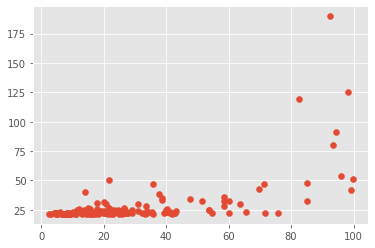

In [ ]:
#plotting predicted body weights vs actual body weights of penguins
y_preds=gs.predict(X_test)
plt.scatter(y_test,y_preds);

### Feature Selection

#### Feature Importance with Gradient Boosting

In [ ]:
# GradientBoostingRegressor will be used for feature importance
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_preds = reg_model.predict(X_test)
r2_score(y_test, y_preds)

0.4288759363250807

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
dropout_reason_inclusion/exclusion criteria issue,0.318439
dropout_reason_lost to follow-up,0.058545
event_type_other,0.045327
Headache,0.040401
study_duration_months,0.038388
Abdominal pain,0.037683
intervention_model_type_Factorial Assignment,0.037326
Genetic,0.034936
Nausea,0.028028
dropout_reason_adverse event,0.025854


In [ ]:
#create list of top 30 features
boost_top_10 = feature_imp.head(10).index.values
boost_top_10_list = list(boost_top_10)

In [ ]:
X_boost_df = X_df[X_df.columns.intersection(boost_top_10_list)]

In [ ]:
# Train/test split:
X_boost_train, X_boost_test, y_train, y_test = train_test_split(X_boost_df, y_df, test_size = 0.2, random_state = 2)

X_boost_train.shape, X_boost_test.shape

((271, 10), (68, 10))

##### Model Set-up

In [ ]:
# Continous outcome prediction:

def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  # Make predictions with model
  y_pred = reg_model.predict(X_test)
  #Metrics
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val}

Linear Regression

In [ ]:
# Linear Regression:

lr_model = LinearRegression()

scores = cross_val_score(lr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([-0.52372859,  0.22300902,  0.40490087,  0.28289511,  0.22152235])

In [ ]:
# k-fold CV (using all the boost variables)
train_and_test(lr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 320.12078109174996, 'R2_Score': 0.27008943892479653}

Random Forest

In [ ]:
# Random Forest Regression:

rfr_model = RandomForestRegressor()

scores = cross_val_score(rfr_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.21087431, 0.4829302 , 0.49542987, 0.26260168, 0.45673906])

In [ ]:

train_and_test(rfr_model, X_boost_train, y_train, X_boost_test, y_test)

{'MSE_Score': 239.01657569297282, 'R2_Score': 0.455015940310575}

Gradient Boosting

In [ ]:
# Gradient Boost for feature importance:

boost_model = GradientBoostingRegressor(random_state=0)   

scores = cross_val_score(boost_model, X_boost_train, y_train, scoring='r2', cv=5)
scores   

array([0.11861583, 0.52141256, 0.46201785, 0.23063168, 0.37609487])

In [ ]:
boost_model.fit(X_boost_train, y_train)
y_preds = boost_model.predict(X_boost_test)
r2_score(y_test, y_preds)

0.4156543656927092

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept':[True, False]}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['squared_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
            {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the grid parameters 

#pass in cv=5 for the gridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_boost_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_boost_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_boost_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_boost_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_boost_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
lr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
svm_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
rf_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
dtr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_boost_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_boost_train, y_train)
gbr_y_pred=model.predict(X_boost_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_boost_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

#### Mutual Information Feature Selection 

In [ ]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set
#to get names of the selected features
mask = selector.get_support()  

print(selector.scores_)   

new_features = X_train.columns[mask]

[1.93329965e-01 2.79787357e-02 0.00000000e+00 2.85353136e-01
 1.12896336e-01 2.04555356e-01 6.47709408e-02 1.89068091e-02
 2.36317673e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14886389e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.31302684e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32252200e-03 1.40305033e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39487101e-02
 7.96625655e-03 0.00000000e+00 9.11215201e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24477243e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80357087e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13094503e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45845098e-03 7.19362761e-03
 0.00000000e+00 0.00000000e+00 2.40973048e-03 7.97151068e-03
 1.65255318e-02 2.68652715e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.78600247e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
X_MI_df = V4_master_df[new_features]

In [ ]:
# Train/test split:
X_MI_train, X_MI_test, y_train, y_test = train_test_split(X_MI_df, y_df, test_size = 0.2, random_state = 2)

X_MI_train.shape, X_MI_test.shape

ValueError: ignored

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_MI_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_MI_train, y_train)
reg2.fit(X_MI_train, y_train)
reg3.fit(X_MI_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_MI_train, y_train)

#predict 
pred1 = reg1.predict(X_boost_test)
pred2 = reg2.predict(X_boost_test)
pred3 = reg3.predict(X_boost_test)
pred4 = ereg.predict(X_boost_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_MI_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_MI_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_MI_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_MI_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_MI_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_MI_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_MI_train, y_train)
y_pred=model.predict(X_MI_test)
Accuracy=r2_score(y_test,y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_MI_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))
    print('{} Prediction Accuracy Plot {}'.format(plt.scatter(y_test,y_pred), plt.xlabel('Actual'), plt.ylabel('Predicted'), plt.title(Accuracy)))

#### Knowledge Feature Selection

In [ ]:
df_list = list(X_df[['number_of_arms', 'has_dmc', 'number_of_facilities', 'study_duration_months', 'event_type_deaths', 'event_type_other', 'event_type_serious']])

In [ ]:
dropout_list = list(X_df[['dropout_reason_adverse event', 'dropout_reason_inclusion/exclusion criteria issue', 'dropout_reason_lost to follow-up']])

In [ ]:
top_ae_table_list

['Headache',
 'Nausea',
 'Fatigue',
 'Vomiting',
 'Decreased appetite',
 'Diarrhoea',
 'Sedation',
 'Rash',
 'Increased appetite',
 'Palpitations']

In [ ]:
X_knowledge_df = X_df[X_df.columns.intersection(top_ae_table_list+dropout_list+df_list)]

In [ ]:
X_knowledge_norm = (X_knowledge_df-X_knowledge_df.min())/(X_knowledge_df.max()-X_knowledge_df.min())

In [ ]:
# Train/test split:
X_knowledge_train, X_knowledge_test, y_train, y_test = train_test_split(X_knowledge_norm, y_df, test_size = 0.2, random_state = 2)

X_knowledge_train.shape, X_knowledge_test.shape

((271, 20), (68, 20))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueErro

Cross Validation Scores are [nan nan nan nan nan]
Average Cross Validation score :nan


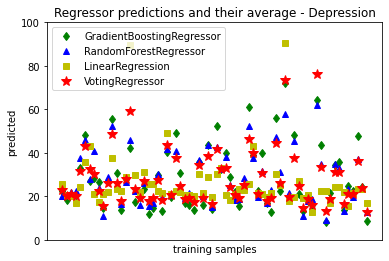

In [ ]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X_knowledge_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_knowledge_train, y_train)
reg2.fit(X_knowledge_train, y_train)
reg3.fit(X_knowledge_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_knowledge_train, y_train)

#predict 
pred1 = reg1.predict(X_knowledge_test)
pred2 = reg2.predict(X_knowledge_test)
pred3 = reg3.predict(X_knowledge_test)
pred4 = ereg.predict(X_knowledge_test)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average - Depression")
plt.setp(plt.gca(),ylim=(0,100))

plt.show()

In [ ]:
#chose five models to train the data with to see which performs the best : Linear Regression and Support Vector Regression
pipe_lr = Pipeline([('LR', LinearRegression())])
pipe_svm = Pipeline([('SVM', SVR())])
pipe_rfr = Pipeline([('RFR', RandomForestRegressor())])
pipe_dtr = Pipeline([('DTR', DecisionTreeRegressor())])
pipe_gbr = Pipeline([('DTR', GradientBoostingRegressor())])

#create GridSearch parameters

#creates lists to pass into the grid below
C = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
n_estimators = [50,100,150, 200, 300, 500,1000, 1500]
n_jobs = np.array([1, 10, 100, 290, 500])
bootstrap = [True, False]
max_depth = [3,4,6,8,10]
min_samples_split = [10,20,40]
max_depth = [2, 6, 8]
min_samples_leaf = [20, 40, 100]
max_leaf_nodes = [5, 20, 100]
learning_rate = [0.01,0.02,0.03,0.04]
subsample = [0.9, 0.5, 0.2, 0.1]

#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_space = [{'fit_intercept': ['svd'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['cholesky'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['lsqr'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sparse_cg'], 'n_jobs' : n_jobs},
         {'fit_intercept': ['sag'],  'n_jobs' : n_jobs},
         {'fit_intercept': ['saga'], 'n_jobs' : n_jobs}]

svr_space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

rfr_space = [{'max_features' : ["auto"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["sqrt"], 'n_estimators' : n_estimators, 'max_depth' : max_depth},
             {'max_features' : ["log2"], 'n_estimators' : n_estimators, 'max_depth' : max_depth}]

dtr_space = [{'criterion': ['mse'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes},
         {'criterion': ['absolute_error'], 'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes' : max_leaf_nodes}]

gbr_space = [{'learning_rate': learning_rate, 'subsample' : subsample, 'n_estimators' : n_estimators, 'max_depth' : max_depth}]



##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_gs = GridSearchCV(LinearRegression(), param_grid = lr_space, scoring = 'r2', cv = 5, n_jobs = -1)
svm_gs = GridSearchCV(SVR(), param_grid = svr_space, scoring = 'r2', cv = 5, n_jobs = -1)
rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid = rfr_space, scoring = 'r2', cv = 5, n_jobs = -1)
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid = dtr_space, scoring = 'r2', cv = 5, n_jobs = -1)
gbr_gs = GridSearchCV(GradientBoostingRegressor(), param_grid = gbr_space, scoring = 'r2', cv = 5, n_jobs = -1)

lr_grids = [lr_gs]

for lr_pipe in lr_grids:
    lr_pipe.fit(X_knowledge_train,y_train)

svm_grids = [svm_gs]

for svm_pipe in svm_grids:
    svm_pipe.fit(X_knowledge_train,y_train)

rfr_grids = [rfr_gs]

for rfr_pipe in rfr_grids:
    rfr_pipe.fit(X_knowledge_train,y_train)

dtr_grids = [dtr_gs]

for dtr_pipe in dtr_grids:
    dtr_pipe.fit(X_knowledge_train,y_train)

gbr_grids = [gbr_gs]

for gbr_pipe in gbr_grids:
    gbr_pipe.fit(X_knowledge_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
lr_grid_dict = {0: 'Linear Regression'}

#then create a for loop to train them all 
for i, model in enumerate(lr_grids):
    print('{} Train R_Square: {}'.format(lr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
lr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,lr_y_pred)*100

for i, model in enumerate(lr_grids):
    print('{} Test R_Square: {}'.format(lr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(lr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
svm_grid_dict = {0: 'Support Vector Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(svm_grids):
    print('{} Train R_Square: {}'.format(svm_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
svm_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,svm_y_pred)*100

for i, model in enumerate(svm_grids):
    print('{} Test R_Square: {}'.format(svm_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(svm_grid_dict[i],          results.best_params_))
    
#first create a dictionary that contains the classifier types to used int eh for loop. 
rfr_grid_dict = {0: 'Random Forest Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(rfr_grids):
    print('{} Train R_Square: {}'.format(rfr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
rf_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,rf_y_pred)*100

for i, model in enumerate(rfr_grids):
    print('{} Test R_Square: {}'.format(rfr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(rfr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
dtr_grid_dict = {0: 'Decision Tree Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(dtr_grids):
    print('{} Train R_Square: {}'.format(dtr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
dtr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,dtr_y_pred)*100

for i, model in enumerate(dtr_grids):
    print('{} Test R_Square: {}'.format(dtr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(dtr_grid_dict[i],          results.best_params_))
   
#first create a dictionary that contains the classifier types to used int eh for loop. 
gbr_grid_dict = {0: 'Gradient Boosting Regressor'}

#then create a for loop to train them all 
for i, model in enumerate(gbr_grids):
    print('{} Train R_Square: {}'.format(gbr_grid_dict[i],    model.score(X_knowledge_train,y_train)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          model.best_params_))

results = model.fit(X_knowledge_train, y_train)
gbr_y_pred=model.predict(X_knowledge_test)
Accuracy=r2_score(y_test,gbr_y_pred)*100

for i, model in enumerate(gbr_grids):
    print('{} Test R_Square: {}'.format(gbr_grid_dict[i],    results.score(X_knowledge_test,y_test)))
    print('{} Best Params: {}'.format(gbr_grid_dict[i],          results.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Abdominal distension
- Abdominal hernia
- Abdominal pain
- Abortion spontaneous
- Accepts_Healthy_volunteers
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#plot predictions 
plt.figure()
plt.plot(lr_y_pred, "gd", label="Linear Regression")
plt.plot(svm_y_pred, "b^", label="Support Vector Regressor")
plt.plot(rf_y_pred, "ys", label="Random Forest Regressor")
plt.plot(dtr_y_pred, "r*", ms=10, label="Decision Tree Regressor")
plt.plot(gbr_y_pred, "bs", label="Gradient Boosting Regressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions - Knowledge Based Feature Selection - Depression")
plt.setp(plt.gca(),ylim=(0,100))